# Implementing Hyperparameter Tuning in Machine Learning Algorithms for Classification in the Case of Telecom Customer Churn Dataset

**A lil bit INTRODUCTION**

Hi, I'm Selpha Yulida, a data enthusiast that just started my data learning journey through joining Dibimbing bootcamp Data Science Batch 13. This project is about learning hyperparameter tuning in supervised machine learning (classification) model. We use case in telecom customer churn dataset, that got during the bootcamp. This version of the dataset is slightly different from the dataset available on kaggle. 

This dataset consists of 7046 rows and 12 columns. In this project, we will perform some machine learning algorithms for creating classification the churn of customer in telecom company by implementing hyperparameter tuning to get the best hyperparameter for modeling purpose.


**Overall Steps**
1. Import all Libraries & Load the Dataset
2. Basic Data Cleaning (Missing Values & Duplicated Values)
3. Encode Target Variable (Label Encoding)
4. Split Data (Train and test)
5. Multicolliniearity Study (Feature Selection)
6. Handle Categorical Data (Label & One Hot Encoding) - Apply for both train and test data
7. Modelling - Implementing Hyperparameter Tuning
8. Evaluation on Test Data


In this porject we will perform some popular classification ML algortihm such as:
- K-Nearest Neighbor (KNN)
- Random Forest Classifier
- Logistic Regression
- Decision Tree
- Naive Bayes

We didn't implement Support Vector Machines (SVM) due to technical issue :(

Please kindly connect to my LinkedIn https://www.linkedin.com/in/selphayulida/ and visit my Github https://github.com/selphayulida/

Thank You in Advance!

**Please kindly note that the highlight of this project is implementing hyperparameter tuning, so there may be some steps missed or required to be optimized**

# Import Libraries

In [1]:
# First we'll import all libraries that will be used in this project
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# encoding
from sklearn import preprocessing

# split data
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load & Understand the Dataset

In [2]:
# Load telecom customer churn dataset

df = pd.read_csv('churn.csv')
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# gathering the basic info of this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


- The dataset consist of 7046 rows and 12 columns.
- We won't use `customerID` column in this project, so we'll drop it later.
- Target is `Churn` column that is still in object dtype, so we'll handle it later.
- We have some categorical data that need to be encoded later.
- We will also check the multicollinierity among numerical datas.

**Columns Understanding**
1. `customerID`: Customer ID
2. `Gender`: Customer gender (Male/ Female)
3. `SeniorCitizen`: Whether the customer is a senior citizen (65 or older) or not. (1= Senior Citizen; 0=non Senior Citizen)
4. `Partner`: Indicates if customer has partner or not/single (Yes/ No)
5. `Dependents`: Whether the customer has dependents or not (Yes/No). Dependents can be children, parents, etc
6. `Tenure`: Represents the total number of months that customers have been with the company
7. `Contract`: Shows the customer's current contract type (Month-to-month/ One year/ Two year)
8. `PaperlessBilling`: Indicates whether the customer uses paperless billing (Yes/ No)
9. `PaymentMethod`: Shows the customer's choice of how to pay for their bill (Electronic check/ Mailed check/ Bank transfer (automatic)/ Credit card (automatic)
10. `MonthlyCharges`: Shows the customer's current total monthly charges for all the services they use
11. `TotalCharges`: Shows the total cost of the customer
12. `Churn`: Shows Customer churn status (Yes/ No)

# Basic Data Cleaning

## Handling Missing Value

In [4]:
# make dataframe of missing value for easy reading

data_nan = df.isna().sum().reset_index()
data_nan.columns = ['feature','missing_value']
data_nan['percentage'] = round((data_nan['missing_value']/len(df))*100,2)
data_nan = data_nan.sort_values('percentage', ascending=False).reset_index(drop=True)
data_nan = data_nan[data_nan['percentage']>0]
data_nan

,feature,missing_value,percentage
0,Dependents,19,0.27
1,Tenure,17,0.24
2,Gender,16,0.23
3,Partner,16,0.23
4,Contract,13,0.18
5,PaperlessBilling,13,0.18
6,SeniorCitizen,12,0.17
7,PaymentMethod,11,0.16
8,MonthlyCharges,10,0.14
9,customerID,9,0.13


In percentage the number of missing values data is very small (less than 1%)

In [5]:
# check overall (total missing value) just in case the missing values are located on different rows

(data_nan['missing_value'].sum()/len(df))*100

1.9301731478853252

Even if the missing values are all in different rows, the total number is still very small (less than 2%) and can be dropped.

In [6]:
# drop missing values

print('rows before drop missing values : ', len(df))
df = df.dropna().reset_index(drop=True)
print('rows after drop missing values : ', len(df))

rows before drop missing values :  7046
rows after drop missing values :  6911


In [7]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
1,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
4,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


rows before drop missing values :  7046

rows after drop missing values :  6911

It means that we dropped 135 rows (1.92%)

## Handling Duplicated Value

In [8]:
# check duplicated values

print('duplicated values : ', df.duplicated().sum())
print('percentage of duplicated values : ', df.duplicated().sum()/len(df)*100)

duplicated values :  13
percentage of duplicated values :  0.1881059181015772


Because the number of duplicated values is very small, we just drop them.

In [9]:
# drop missing values

print('rows before drop duplicated values : ', len(df))
df = df.drop_duplicates().reset_index(drop=True)
print('rows after drop duplicated values : ', len(df))

rows before drop duplicated values :  6911
rows after drop duplicated values :  6898


We have successfully dropped duplicated values and have 6898 rows now.

In [10]:
# We will also drop customer ID cause we won't use it

df.drop('customerID', axis=1, inplace=True)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
1,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
4,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


# Encode Target Variable

We will understand the value counts of each columns for the need of encoding process later on.

In [11]:
# Grouping columns
all_categoricals = ['Gender', 'Partner', 'Dependents','Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# showing the precise value counts
for col in all_categoricals:
  print(f"Value counts of \033[1m{col}\033[0m column")
  print(df[col].value_counts(), '\n')

Value counts of Gender column
Male      3488
Female    3410
Name: Gender, dtype: int64 

Value counts of Partner column
No     3573
Yes    3325
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4845
Yes    2053
Name: Dependents, dtype: int64 

Value counts of Contract column
Month-to-month    3803
Two year          1653
One year          1442
Name: Contract, dtype: int64 

Value counts of PaperlessBilling column
Yes    4088
No     2810
Name: PaperlessBilling, dtype: int64 

Value counts of PaymentMethod column
Electronic check             2309
Mailed check                 1581
Bank transfer (automatic)    1514
Credit card (automatic)      1494
Name: PaymentMethod, dtype: int64 

Value counts of Churn column
No     5073
Yes    1825
Name: Churn, dtype: int64 



This time we will perform label encoding for target column `Churn`. And we will handle the rest later.

In [12]:
# encode target column that has 2 values (as above) using label encoding.

df['Churn'] = df['Churn'].transform(preprocessing.LabelEncoder().fit_transform)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,0
1,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,1
2,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,0
3,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,1
4,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,1


# Split Data (Training & Testing)

We split data into train and test, so that all decisions during feature selection that we'll make are only based on train data, so that there is no data leakage in the test data.

In [13]:
# as always, first thing is to split the data

X = df.drop(columns='Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Multicollinear Study

We will check whether there are some features that are strongly correlated with each other. We use the correlation heatmap and make a feature selection decision based on the results.

<function matplotlib.pyplot.show(close=None, block=None)>

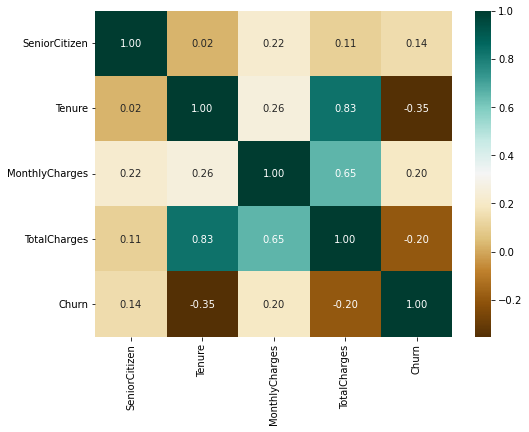

In [14]:
# heatmap correlation

df_train = pd.concat([X_train, y_train], axis=1)
corr = df_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='BrBG', fmt='.2f')
plt.show

From Corr Heatmap above, there are 2 features that are correlated each other (Threshold: abs(corr) >= 0.8)

`Tenure` and `TotalCharges`  >>  so we need to compare each value with target `Churn`

Based on the value we need to drop `TotalCharges`

In [15]:
# drop `TotalCharges` column on both train data (X_train) and test data(X_test)

X_train = X_train.drop(columns = ['TotalCharges'])
X_test = X_test.drop(columns=['TotalCharges'])

# Handle Categorical Data

We will perform encoding for all categorical data. Based on the observation before there are some features that consist of 2 values and more than 2 values. For features that consist of 2 values we will perform label encoding. While the other features that have more than 2 values, we will do one hot encoding.

Label Encoding for these columns (has 2 values): Gender, Partner, Dependents, PaperlessBilling
One Hot Encoding for these columns (hase >2 values): Contract, PaymentMethod

## Label Encoding

In [16]:
# Label Encoding (features with 2 values), group those for easier encoding process
le_columns = ['Gender', 'Partner', 'Dependents', 'PaperlessBilling']

# encode X_train categorical features with 2 values (as above) using label encoding.
X_train[le_columns] = X_train[le_columns].transform(preprocessing.LabelEncoder().fit_transform)
X_train.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
969,1,0.0,1,1,34.0,One year,0,Credit card (automatic),19.60
4505,1,0.0,0,1,1.0,Month-to-month,1,Mailed check,59.55
1912,0,0.0,1,1,49.0,Month-to-month,1,Bank transfer (automatic),95.40
4173,1,0.0,1,0,17.0,Month-to-month,0,Credit card (automatic),90.20
6337,1,0.0,0,0,35.0,Two year,0,Bank transfer (automatic),21.45


Successfully encoded (Gender, Partner, Dependents, PaperlessBilling) columns on the X_train!!!

In [17]:
# encode X_test categorical features with 2 values (as above) using label encoding.
X_test[le_columns] = X_test[le_columns].transform(preprocessing.LabelEncoder().fit_transform)
X_test.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2908,1,0.0,0,0,24.0,Month-to-month,1,Electronic check,85.95
2666,0,0.0,0,0,63.0,Month-to-month,0,Credit card (automatic),108.25
5809,1,0.0,1,1,56.0,One year,1,Mailed check,85.85
5832,1,0.0,1,1,22.0,One year,1,Mailed check,78.65
3710,1,0.0,0,0,42.0,Month-to-month,1,Electronic check,100.30


Successfully encoded (Gender, Partner, Dependents, PaperlessBilling) columns on the X_test!!!

## One Hot Encoding

We will perform One Hot Encoding using pd.get_dummies, and apply to Contract and PaymentMethod.

In [18]:
# one hot encode X_train categorical features with more than 2 values (as above) using pd.get_dummies.
X_train = pd.get_dummies(data=X_train , columns=['Contract','PaymentMethod'])
X_train.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
969,1,0.0,1,1,34.0,0,19.60,0,1,0,0,1,0,0
4505,1,0.0,0,1,1.0,1,59.55,1,0,0,0,0,0,1
1912,0,0.0,1,1,49.0,1,95.40,1,0,0,1,0,0,0
4173,1,0.0,1,0,17.0,0,90.20,1,0,0,0,1,0,0
6337,1,0.0,0,0,35.0,0,21.45,0,0,1,1,0,0,0


Successfully encoded (Contract and PaymentMethod) columns on the X_train!!!

In [19]:
# one hot encode X_train categorical features with more than 2 values (as above) using pd.get_dummies.
X_test = pd.get_dummies(data=X_test , columns=['Contract','PaymentMethod'])
X_test.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2908,1,0.0,0,0,24.0,1,85.95,1,0,0,0,0,1,0
2666,0,0.0,0,0,63.0,0,108.25,1,0,0,0,1,0,0
5809,1,0.0,1,1,56.0,1,85.85,0,1,0,0,0,0,1
5832,1,0.0,1,1,22.0,1,78.65,0,1,0,0,0,0,1
3710,1,0.0,0,0,42.0,1,100.30,1,0,0,0,0,1,0


Successfully encoded (Contract and PaymentMethod) columns on the X_test!!!

# K-Nearest Neighbor (KNN)

## Confusion Matrix

The dataset that we are using is imbalanced data where the target variable is `Churn` with 'Yes' value of 1825 and 'No' value of 5073. So for evaluation and also scoring selection in hyperparameter tuning, the confusion matrix will be used.

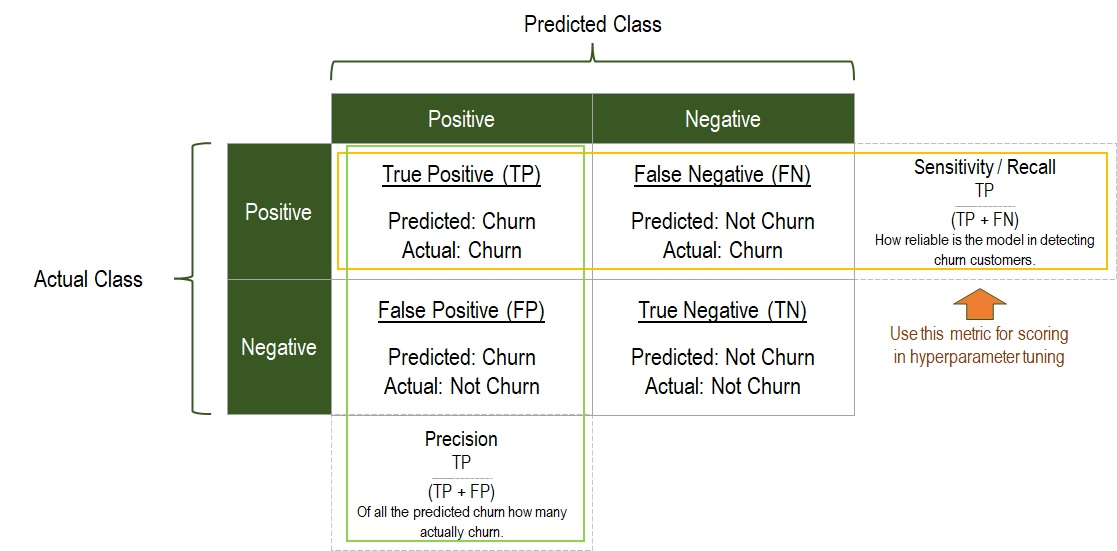


In the case of detecting churn customers, we want the model to be able to detect churn well. We don't want our model to mispredict not churn but actually churn (FN). This of course will be detrimental to the company.

So in this case, **sensitivity/recall** is the right metric because the occurrence of false negatives is very much wanted to be avoided (a big risk for the company).

According to the formula, of course, we expect maximum TP and minimum FN so that the model is said to be reliable in detecting churn customers.

## Hyperparameter Tuning - KNN

In [20]:
# define the estimator/model

knn = KNeighborsClassifier()

In [21]:
# hyperparameter tuning

params_knn = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_gridcv = GridSearchCV(knn, params_knn, cv=5, scoring='recall')
knn_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [22]:
# the compact results
cv_knn = pd.DataFrame(knn_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_knn[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,{'n_neighbors': 3},0.517770,1
5,{'n_neighbors': 7},0.503833,2
3,{'n_neighbors': 5},0.503136,3
6,{'n_neighbors': 8},0.419512,4
4,{'n_neighbors': 6},0.413937,5
2,{'n_neighbors': 4},0.373519,6
0,{'n_neighbors': 2},0.321254,7


The best score for knn is parameter with 3 neighbors. But the score is only 0.52 (around 52%).
Let's check how if we add another parameter 'weight' in our knn model.

In [23]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence

params_knn = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_w_gridcv = GridSearchCV(knn, params_knn, cv=5, scoring='recall')
knn_w_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [24]:
# the compact results
cv_w_knn = pd.DataFrame(knn_w_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_w_knn[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.517770,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.513589,2
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.508014,3
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.505923,4
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.503833,5
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.503833,5
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.503136,7
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.502439,8
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.501045,9
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.501045,9


The best score shows the same result, 3 neighbors with uniform for the weight. The score is also the same +- 52%.

## Evaluation on Test Data - KNN

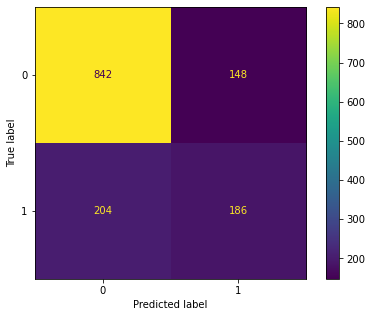

In [25]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(7,5))
y_pred_knn = knn_w_gridcv.best_estimator_.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_w_gridcv.best_estimator_.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                             display_labels=knn_w_gridcv.best_estimator_.classes_)
disp_knn.plot(ax=ax)
plt.show()

From total 1380 test data, here is the prediction result that shown as a confusion matrix.
- True Positive (TP) - Predicted 'Churn'; Actual 'Churn': 186 ppl
- False Negative (FN) - Predicted 'Not Churn'; Actual 'Churn' : 204 ppl
- False Positive (FP) - Predicted 'Churn'; Actual 'Not Churn' : 148 ppl
- True Negative (TN) - Predicted 'Not Churn'; Actual 'Not Churn' : 842 ppl

In [26]:
# classification report

y_pred_knn = knn_w_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       990
           1       0.56      0.48      0.51       390

    accuracy                           0.74      1380
   macro avg       0.68      0.66      0.67      1380
weighted avg       0.73      0.74      0.74      1380



On the test data we got 0.48 for recall metric. It means that the model's reliability to detect churn is still low 48%. The probability of the model being incorrectly predicted not to churn even though the actual churn is still very high.

The precision score is also still low around 56%, it means that from all data that are predicted as churn, only 56% that are really churn.

The f1 score is 51% which is the harmonic mean of precision and recall. 

If we look at the accuracy value, it is certainly much better at around 74%, this figure is quite misleading, when in fact if we look at the confusion matrix, the model built has not been able to detect churn properly.

# Random Forest Classifier

## Hyperparameter Tuning - RF

In [27]:
# define random forest classifier model

rf = RandomForestClassifier(random_state=42)

In [28]:
# hyperparameter tuning

params_rf = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_gridcv = GridSearchCV(rf, params_rf, cv=5, scoring='recall')
rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [29]:
# the results
cv_rf = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_rf[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.401394,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.381185,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.375610,3
24,"{'max_depth': 5, 'n_estimators': 50}",0.373519,4
22,"{'max_depth': 5, 'n_estimators': 30}",0.370732,5
15,"{'max_depth': 4, 'n_estimators': 10}",0.329617,6
10,"{'max_depth': 3, 'n_estimators': 10}",0.328920,7
16,"{'max_depth': 4, 'n_estimators': 20}",0.297561,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.296167,9
19,"{'max_depth': 4, 'n_estimators': 50}",0.296167,10


The best score for random forest is parameter with max_depth: 5, n_estimators: 10. But the score is only 0.40 (around 40%). It looks even worse than KNN model. Let's check the evaluation on the test data.

## Evaluation on Test Data - RF

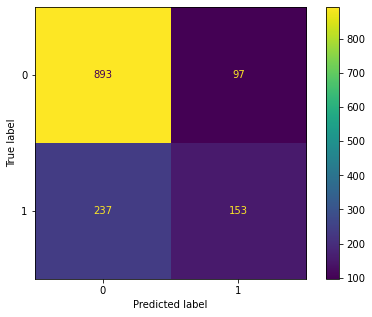

In [30]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(7,5))
y_pred_rf = rf_gridcv.best_estimator_.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_gridcv.best_estimator_.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp_rf.plot(ax=ax)
plt.show()

From total 1380 test data, here is the prediction result that shown as a confusion matrix.
- True Positive (TP) - Predicted 'Churn'; Actual 'Churn': 153 ppl
- False Negative (FN) - Predicted 'Not Churn'; Actual 'Churn' : 237 ppl
- False Positive (FP) - Predicted 'Churn'; Actual 'Not Churn' : 97 ppl
- True Negative (TN) - Predicted 'Not Churn'; Actual 'Not Churn' : 893 ppl

In [31]:
# classification report

y_pred_rf = rf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       990
           1       0.61      0.39      0.48       390

    accuracy                           0.76      1380
   macro avg       0.70      0.65      0.66      1380
weighted avg       0.74      0.76      0.74      1380



On the test data we got 0.39 for recall metric. It means that the model's reliability to detect churn is still low 39%. The probability of the model being incorrectly predicted not to churn even though the actual churn is still very high.

The precision score is around 61%, it means that from all data that are predicted as churn, 61% that are really churn.

The f1 score is 48% which is the harmonic mean of precision and recall. 

If we look at the accuracy value, it is certainly much better at around 76%, this figure is quite misleading, when in fact if we look at the confusion matrix, the model built has not been able to detect churn properly.

Based on recall metric this model is even worse than KNN.

# Logistic Regression

## Hyperparameter Tuning - LogReg

In [32]:
# define logistic regression model

lr = LogisticRegression(max_iter=10000, random_state=42)

In [33]:
# hyperparameter tuning

params_lr = {
    'solver' : ('newton-cg', 'lbfgs', 'liblinear')
}

# note: we use recall
lr_gridcv = GridSearchCV(lr, params_lr, cv=5, scoring='recall')
lr_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'solver': ('newton-cg', 'lbfgs', 'liblinear')},
             scoring='recall')

In [34]:
# the results
cv_lr = pd.DataFrame(lr_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_lr[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,{'solver': 'newton-cg'},0.505226,1
1,{'solver': 'lbfgs'},0.505226,2
2,{'solver': 'liblinear'},0.504530,3


The best score for Logistic Regression is parameter with solver: newton-cg. And the score is only 0.50 (around 50%). It is still not good tho. Let's check the evaluation on the test data.

## Evaluation on Test Data - Logreg

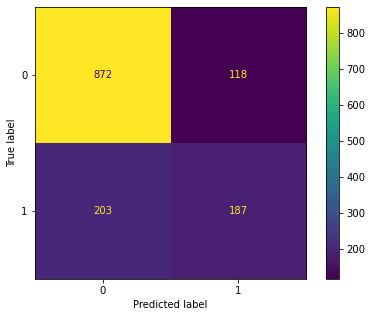

In [35]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(7,5))
y_pred_lr = lr_gridcv.best_estimator_.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_gridcv.best_estimator_.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                             display_labels=lr_gridcv.best_estimator_.classes_)
disp_lr.plot(ax=ax)
plt.show()

From total 1380 test data, here is the prediction result that shown as a confusion matrix.
- True Positive (TP) - Predicted 'Churn'; Actual 'Churn': 187 ppl
- False Negative (FN) - Predicted 'Not Churn'; Actual 'Churn' : 203 ppl
- False Positive (FP) - Predicted 'Churn'; Actual 'Not Churn' : 118 ppl
- True Negative (TN) - Predicted 'Not Churn'; Actual 'Not Churn' : 872 ppl

In [36]:
# classification report

y_pred_lr = lr_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       990
           1       0.61      0.48      0.54       390

    accuracy                           0.77      1380
   macro avg       0.71      0.68      0.69      1380
weighted avg       0.76      0.77      0.76      1380



On the test data we got 0.48 for recall metric. It means that the model's reliability to detect churn is still low 48%. The probability of the model being incorrectly predicted not to churn even though the actual churn is still very high.

The precision score is around 61%, it means that from all data that are predicted as churn, 61% that are really churn.

The f1 score is 54% which is the harmonic mean of precision and recall. 

If we look at the accuracy value, it is certainly much better at around 77%, this figure is quite misleading, when in fact if we look at the confusion matrix, the model built has not been able to detect churn properly.

This model is still as not reliable as previous models.

# Decision Tree

## Hyperparameter Tuning - DT

In [37]:
# define decision tree model

dt = DecisionTreeClassifier(random_state=42)

In [38]:
# hyperparameter tuning

params_dt = {
    'max_depth': (2, 3, 5, 10, 20),
    'min_samples_leaf': (5, 10, 20, 50, 100),
    'criterion': ('gini', 'entropy','log_loss')
}

# note: we use recall
dt_gridcv = GridSearchCV(dt, params_dt, cv=5, scoring='recall')
dt_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (2, 3, 5, 10, 20),
                         'min_samples_leaf': (5, 10, 20, 50, 100)},
             scoring='recall')

In [39]:
# the results
cv_dt = pd.DataFrame(dt_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_dt[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.627875,1
27,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.627875,1
28,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.627875,1
29,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.627875,1
50,"{'criterion': 'log_loss', 'max_depth': 2, 'min...",0.627875,1
...,...,...,...
57,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.377003,61
56,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.377003,61
55,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.377003,61
32,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.377003,61


In [40]:
cv_dt['params'][0]

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}

The best score for Decision Tree is parameter with criterion: gini, max_depth: 2, min_samples_leaf: 5. And the score is 0.63 (around 63%). It is better than previous model. Let's check the evaluation on the test data.

## Evaluation on Test Data - DT

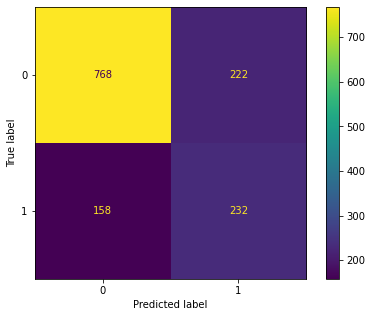

In [41]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(7,5))
y_pred_dt = dt_gridcv.best_estimator_.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_gridcv.best_estimator_.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                             display_labels=dt_gridcv.best_estimator_.classes_)
disp_dt.plot(ax=ax)
plt.show()

From total 1380 test data, here is the prediction result that shown as a confusion matrix.
- True Positive (TP) - Predicted 'Churn'; Actual 'Churn': 232 ppl
- False Negative (FN) - Predicted 'Not Churn'; Actual 'Churn' : 158 ppl
- False Positive (FP) - Predicted 'Churn'; Actual 'Not Churn' : 222 ppl
- True Negative (TN) - Predicted 'Not Churn'; Actual 'Not Churn' : 768 ppl

In [42]:
# classification report

y_pred_dt = dt_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       990
           1       0.51      0.59      0.55       390

    accuracy                           0.72      1380
   macro avg       0.67      0.69      0.68      1380
weighted avg       0.74      0.72      0.73      1380



On the test data we got 0.59 for recall metric. It means that the model's reliability to detect churn is 59%. It is better than previous model but actually the probability of the model being incorrectly predicted not to churn even though the actual churn is still consider as high.

The precision score is around 51%, it means that from all data that are predicted as churn, 51% that are really churn.

The f1 score is 55% which is the harmonic mean of precision and recall. 

If we look at the accuracy value, it is certainly much better at around 72%, this figure is quite misleading, when in fact if we look at the confusion matrix, the model built has not been able to detect churn properly.

Based on recall metric this model is better than previous models but still consider as not reliable to detect churn.

# Naive Bayes

## Hyperparameter Tuning - NB

In [43]:
# define decision tree model

nb = GaussianNB()

In [44]:
# hyperparameter tuning

params_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# note: we use recall
nb_gridcv = GridSearchCV(nb, params_nb, cv=5, scoring='recall')
nb_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall')

In [45]:
# the results
cv_nb = pd.DataFrame(nb_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_nb[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
99,{'var_smoothing': 1e-09},0.806969,1
78,{'var_smoothing': 8.111308307896873e-08},0.806969,1
77,{'var_smoothing': 1e-07},0.806969,1
76,{'var_smoothing': 1.232846739442066e-07},0.806969,1
75,{'var_smoothing': 1.519911082952933e-07},0.806969,1
...,...,...,...
4,{'var_smoothing': 0.43287612810830584},0.000000,96
3,{'var_smoothing': 0.533669923120631},0.000000,96
2,{'var_smoothing': 0.657933224657568},0.000000,96
1,{'var_smoothing': 0.8111308307896871},0.000000,96


The best score for Naive Bayes is parameter with var_smoothing: 1e-09. And the score is 0.80 (around 80%). It is much better than previous model. Let's check the evaluation on the test data.

## Evaluation on Test Data - NB

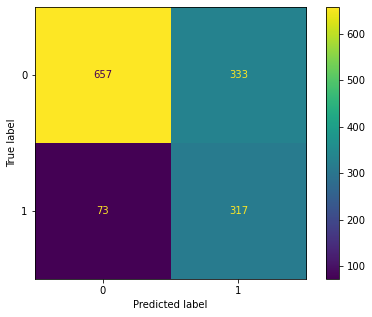

In [46]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(7,5))
y_pred_nb = nb_gridcv.best_estimator_.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_gridcv.best_estimator_.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                             display_labels=nb_gridcv.best_estimator_.classes_)
disp_nb.plot(ax=ax)
plt.show()

From total 1380 test data, here is the prediction result that shown as a confusion matrix.
- True Positive (TP) - Predicted 'Churn'; Actual 'Churn': 317 ppl
- False Negative (FN) - Predicted 'Not Churn'; Actual 'Churn' : 73 ppl
- False Positive (FP) - Predicted 'Churn'; Actual 'Not Churn' : 333 ppl
- True Negative (TN) - Predicted 'Not Churn'; Actual 'Not Churn' : 657 ppl

In [47]:
# classification report

y_pred_nb = nb_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       990
           1       0.49      0.81      0.61       390

    accuracy                           0.71      1380
   macro avg       0.69      0.74      0.69      1380
weighted avg       0.78      0.71      0.72      1380



On the test data we got 0.81 for recall metric. It means that the model's reliability to detect churn is 81%. It is much better than previous models.

The precision score is around 49%, it means that from all data that are predicted as churn, 49% that are really churn.

The f1 score is 61% which is the harmonic mean of precision and recall. 

If we look at the accuracy value, it is certainly much better at around 71%, this figure is quite misleading, when in fact if we look at the confusion matrix, it shows different meaning/understanding.

Based on recall metric this model is much better than previous models to detect churn.

Although the precision score is consider as low, but recall metric is much more important.

# Support Vector Machines (SVM)

## Hyperparameter Tuning - SVM

In [48]:
# define decision tree model
#from sklearn.svm import SVC

#svm = SVC(random_state = 42)

In [49]:
#from sklearn.model_selection import GridSearchCV

#parameters = {
#    'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
#    'C' : (50, 10, 1.0, 0.1, 0.01),
#    'gamma' : ('scale', 'auto')
#}

# note: we use recall
#svm_gridcv = GridSearchCV(svm, parameters, cv=5, scoring='recall')
#svm_gridcv.fit(X_train, y_train)

## Evaluation on Test Data - SVM

In [50]:
# berat....laptop gak kuat

# Conclusion

The following are conclusions that can be drawn from this project.

- The feature selection process was carried out using a heatmap correlation plot, and it was found that there were two highly correlated features, namely `Tenure` and `TotalCharges`. After comparing the value with the target, the `TotalCharges` feature is dropped.
- The dataset that we are using is imbalanced data where the target variable is Churn with 'Yes' value of 1825 and 'No' value of 5073. So for evaluation and also scoring selection in hyperparameter tuning, the confusion matrix will be used.
- In the case of customer churn, scoring metric that is used for hyperparameter tuning is **sensitivity / recall**, because the occurrence of false negatives is very much wanted to be avoided (a big risk for the company).
- In this project, we compare the results of hyperparameter tuning of 5 classification algorithms, namely KNN, Random Forest, Logistic Regression, Decision Tree and Naive Bayes.
- If you compare the results of the evaluation on the test data with metric recall, the values for each model are as follows:
    - KNN 0.48
    - Random Forest 0.39
    - Logreg 0.48
    - Decision Tree 0.59
    - Naive Bayes 0.81
- Based on the results of the metric recall evaluation on the points above, the **Naive Bayes** model is the most reliable model for detecting churn.